# Explorartory Data Analysis for the discrete stock and crypto currency trading data

### importing the libraries

In [56]:
!pip install holidays
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import holidays

%config InlineBackend.figure_format = 'retina'

### exploring the dataset for basic information

In [57]:
#cryptoData = pd.read_csv("/Users/romilrathi/Desktop/Crypto_Data.csv")
df_stocks = pd.read_csv("stocks.csv")

In [58]:
# print("Earliest Date for Crypto currency", cryptoData['Date'].min())
# print("Latest Date for Crypto currency", cryptoData['Date'].max())

In [59]:
print("Earliest Date for stocks", df_stocks['Date'].min())
print("Latest Date for stocks", df_stocks['Date'].max())

Earliest Date for stocks 2019-01-02
Latest Date for stocks 2020-12-29


In [60]:
print("Number of Holdings in stocks data:", len(set(df_stocks['ticker'])))
#print("Number of Holdings in Crypto data:", len(set(cryptoData['crypto_ticker'])))

Number of Holdings in stocks data: 5


In [61]:
#checking null values for stocks dataframe
pd.pivot_table(df_stocks, values ='Close', index =['Date'], columns =['ticker']).isnull().values.any()

False

In [62]:
# #Checking the null values for Crypto DataFrame
# pd.pivot_table(cryptoData, values ='Close', index =['Date'], columns =['crypto_ticker']).isnull().values.any()

In [63]:
stocks_null = pd.pivot_table(df_stocks, values ='Close', index =['Date'], columns =['ticker'])
stocks_null[stocks_null.isnull().any(axis=1)].sample(0)

ticker,BAC,IBM,PFE,TSLA,XOM
Date,,,,,


There are no null values found in Stocks Price Data

There are null values in Crypto Currency Data as some of them were not launched from the time we started collecting the data, thus this data seems to be sparse and need to be handled efficiently.

### collecting the data for week days excluding national holidays

In [64]:
# Select country
us_holidays = holidays.US()

df_stocks['Holiday'] = df_stocks.Date.apply(lambda x: x in us_holidays)
#cryptoData['Holiday'] = cryptoData.Date.apply(lambda x: x in us_holidays)

In [65]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
#cryptoData['Date'] = pd.to_datetime(cryptoData['Date'])

df_stocks['Day'] = df_stocks['Date'].dt.day_name()
#cryptoData['Day'] = cryptoData['Date'].dt.day_name()

In [66]:
df_stocks = df_stocks.loc[df_stocks['Holiday'] == False]
df_stocks = df_stocks.loc[~df_stocks.Day.isin(['Saturday', 'Sunday'])]

In [67]:
# crypto_stocks = cryptoData.loc[cryptoData['Holiday'] == False]
# cryptoData = crypto_stocks.loc[~crypto_stocks.Day.isin(['Saturday', 'Sunday'])]

### calculating the returns for stocks and crypto currency data

In [68]:
list_of_stock = []
#crypto_data = []

for tick in list(set(df_stocks['ticker'])):
    df = df_stocks.loc[df_stocks['ticker'] == tick]
    df['daily return'] = df['Close'].pct_change(1)
    list_of_stock.append(df)
    

#for ticker in list(set(cryptoData['crypto_ticker'])):
    #temp = cryptoData.loc[cryptoData['crypto_ticker'] == ticker]
    #temp["crypto returns"] = temp['Close'].pct_change()
    #crypto_data.append(temp)
    
#cryptoData = pd.concat(crypto_data)
returns_stocks = pd.concat(list_of_stock)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
for ticker in list(set(returns_stocks['ticker'])):
    temp = returns_stocks.loc[returns_stocks['ticker'] == ticker]
    print(ticker+' has data for '+str(len(set(temp.index)))+' days')

PFE has data for 499 days
TSLA has data for 499 days
IBM has data for 499 days
XOM has data for 499 days
BAC has data for 499 days


In [70]:
# for ticker in list(set(cryptoData['crypto_ticker'])):
#     temp = cryptoData.loc[cryptoData['crypto_ticker'] == ticker]
#     print(ticker+' has data for '+str(len(set(temp.index)))+' days')

### Plotting interactive returns for discrete crypto currency and stocks data for different years

In [71]:
# # Reshaping data
# cryptoData['Date'] = pd.to_datetime(cryptoData['Date'])
# filter_mask = cryptoData['Date'] > pd.Timestamp(2016, 1, 1)
# filtered_df = cryptoData[filter_mask]
# cryptoDataReshaped = filtered_df.pivot(index='Date', columns='crypto_ticker', values='crypto returns')

In [72]:
# cryptoDataReshaped = cryptoDataReshaped.reset_index()

In [73]:
# cryptoDataReshaped.tail()

In [74]:
# # Showing muliple currencies on the same graph

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['BTC'],
#                 name="Bitcoin",
#                 line_color='red',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['ETH'],
#                 name="Ethereum",
#                 line_color='blue',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['LTC'],
#                 name="Litecoin",
#                 line_color='green',
#                 opacity=0.5))



# # Use date string to set xaxis range
# fig.update_layout(xaxis_range=['2019-01-01','2019-10-01'],
#                  title_text = 'Returns for discrete crypto currencies [Year - 2019]')
# fig.update_yaxes(title_text = 'Returns')
# fig.update_xaxes(title_text = 'Time period')
# fig.show()

In [75]:
# # Showing muliple currencies on the same graph

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['BTC'],
#                 name="Bitcoin",
#                 line_color='red',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['ETH'],
#                 name="Ethereum",
#                 line_color='blue',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['LTC'],
#                 name="Litecoin",
#                 line_color='green',
#                 opacity=0.5))



# # Use date string to set xaxis range
# fig.update_layout(xaxis_range=['2018-01-01','2018-12-31'],
#                   title_text = 'Returns for discrete crypto currencies [Year - 2018]')
# fig.update_yaxes(title_text = 'Returns')
# fig.update_xaxes(title_text = 'Time period')
# fig.show()

In [76]:
# # Showing muliple currencies on the same graph

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['BTC'],
#                 name="Bitcoin",
#                 line_color='red',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['ETH'],
#                 name="Ethereum",
#                 line_color='blue',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['LTC'],
#                 name="Litecoin",
#                 line_color='green',
#                 opacity=0.5))



# # Use date string to set xaxis range
# fig.update_layout(xaxis_range=['2017-01-01','2017-12-31'],
#                   title_text = 'Returns for discrete crypto currencies [Year - 2017]')
# fig.update_yaxes(title_text = 'Returns')
# fig.update_xaxes(title_text = 'Time period')
# fig.show()

In [77]:
# # Showing muliple currencies on the same graph

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['BTC'],
#                 name="Bitcoin",
#                 line_color='red',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['ETH'],
#                 name="Ethereum",
#                 line_color='blue',
#                 opacity=0.5))

# fig.add_trace(go.Scatter(
#                 x=cryptoDataReshaped.Date,
#                 y=cryptoDataReshaped['LTC'],
#                 name="Litecoin",
#                 line_color='green',
#                 opacity=0.5))



# # Use date string to set xaxis range
# fig.update_layout(xaxis_range=['2016-01-01','2016-12-31'],
#                   title_text = 'Returns for discrete crypto currencies [Year - 2016]')
# fig.update_yaxes(title_text = 'Returns')
# fig.update_xaxes(title_text = 'Time period')
# fig.show()

In [78]:
# Reshaping data

returns_stocks['Date'] = pd.to_datetime(returns_stocks['Date'])
filter_mask = returns_stocks['Date'] > pd.Timestamp(2016, 1, 1)
filtered_df = returns_stocks[filter_mask]
returns_stocks_reshaped = filtered_df.pivot(index='Date', columns='ticker', values='daily return')
returns_stocks_reshaped = returns_stocks_reshaped.reset_index()

In [79]:
# Showing muliple currencies on the same graph

fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['BAC'],
                name = "Bank of America",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['IBM'],
                name = "IBM",
                line_color ='green',
                opacity = 0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2020-01-01','2020-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2020]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [80]:
# Showing muliple currencies on the same graph

fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['BAC'],
                name = "Bank of America",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['IBM'],
                name = "IBM",
                line_color ='green',
                opacity = 0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2019-01-01','2019-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2019]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [81]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['BAC'],
                name = "Bank of America",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['IBM'],
                name = "IBM",
                line_color ='green',
                opacity = 0.5))




# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2018-01-01','2018-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2018]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [82]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['BAC'],
                name = "Bank of America",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['IBM'],
                name = "IBM",
                line_color ='green',
                opacity = 0.5))




# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2017-01-01','2017-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2017]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')

fig.show()

In [83]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['BAC'],
                name = "Bank of America",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['IBM'],
                name = "IBM",
                line_color ='green',
                opacity = 0.5))




# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2016-01-01','2016-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2016]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [84]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['BAC'],
                name = "Bank of America",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['IBM'],
                name = "IBM",
                line_color ='green',
                opacity = 0.5))




# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2015-01-01','2015-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2015]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

### generating heat maps /  correlation plots

In [85]:
df_stocks.set_index('Date', inplace=True)
#cryptoData.set_index('Date', inplace=True)

In [86]:
corr_df = pd.pivot_table(df_stocks, values ='Close', index =['Date'], columns =['ticker'])
#corr_crypto = pd.pivot_table(cryptoData, values ='Close', index =['Date'], columns =['crypto_ticker'])

In [87]:
correlation_stocks = corr_df.corr()
#correlation_crypto = corr_crypto.corr()

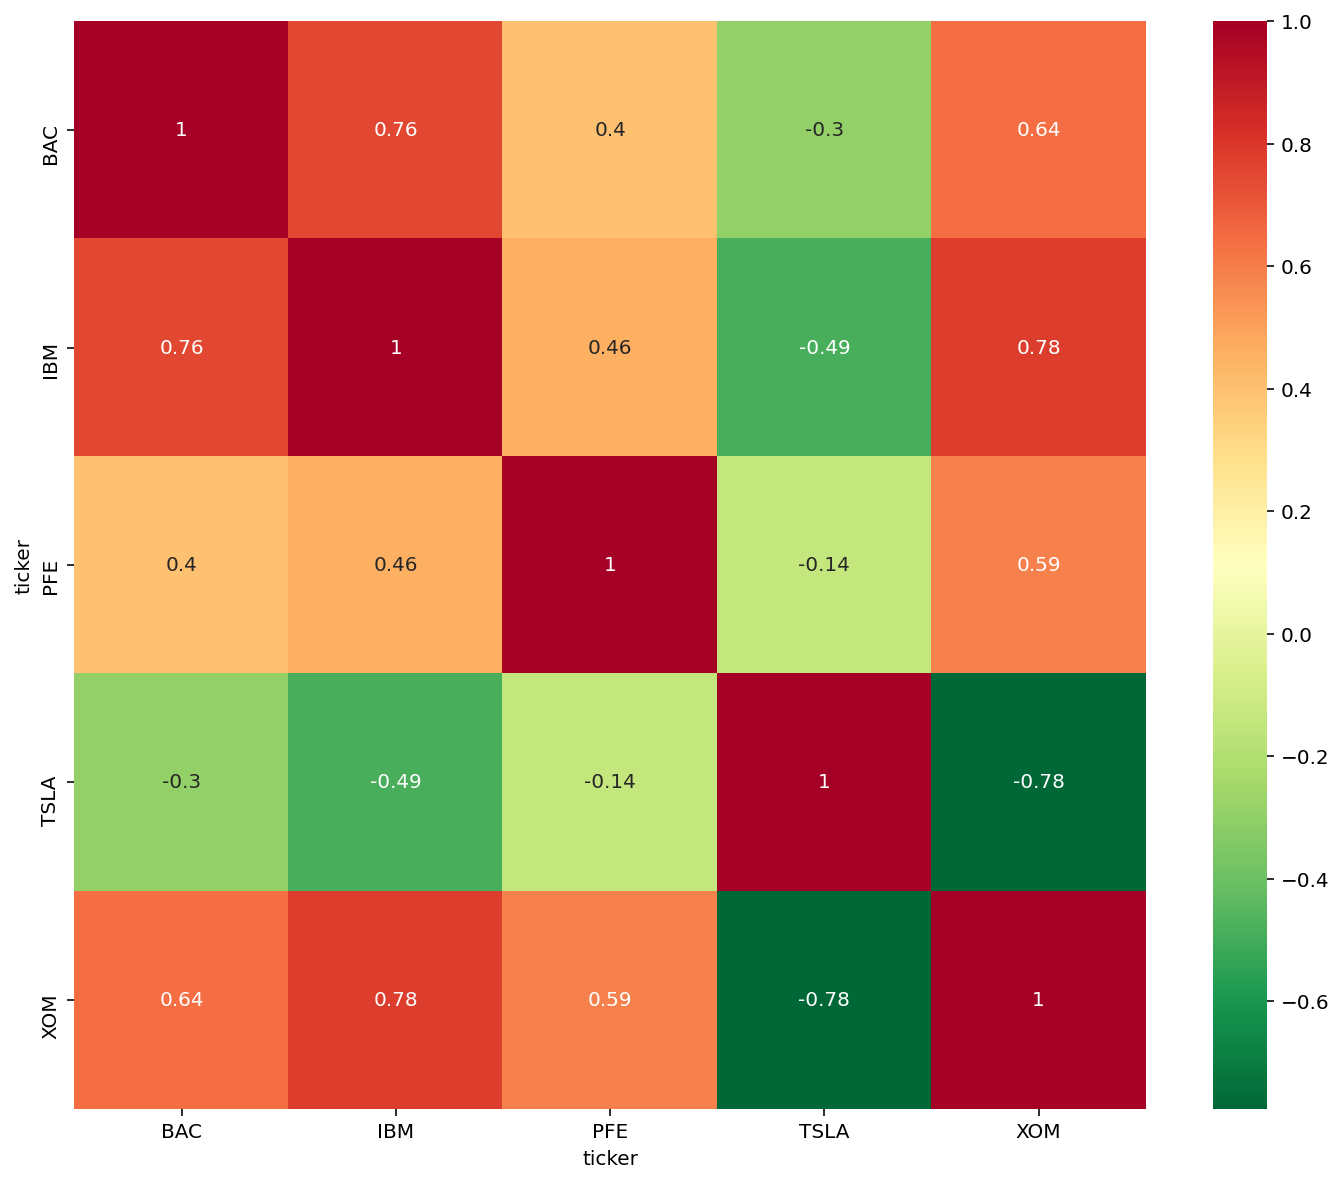

In [88]:
plt.figure(figsize=(12, 10))
sns_plot = sns.heatmap(correlation_stocks, annot=True, cmap="RdYlGn_r")
plt.savefig('Correlation.png')

In [89]:
# plt.figure(figsize=(10, 5))
# sns_plot = sns.heatmap(correlation_crypto, annot=True, cmap="RdYlGn_r")
# plt.savefig('Correlation_crypto.png')